## World Happiness Prediction

Project ini bertujuan untuk memprediksi Tingkat kebahagiaan setiap negara Berdasarkan dataset yang diperoleh dari Kaggle. Metode yang digunakan untuk memprediksi adalah Supervised Learning (Linear Regression Methodh). Dataset terdiri dari tiga file dan masing-masing memiliki perbedaan yang tidak terlalu banyak. 

Tahapan yang dikerjakan di antaranya: 
- Data Preparation  
- Data Integration 
- Data Analysis (Statistik Deskriptif dan Analisa Korelasi)
- Data Visualization
- Model Building

In [1]:
# Import Librraries
import pandas as pd 
import numpy as np 
import os 
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn 
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error  
import plotly.plotly as py 
import plotly.graph_objs as go  
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

## Data Preparation
Pada tahap ini dilakukan proses import data csv ke dalam DataFrame menggunakan librari Pandas. Kemudian dilakukan proses pengecekan terhadap data apakah terdapat missing values, outlier dll. Karena jumlah data nya ada 3 file maka diperlukan standar kolom yang sama untuk setiap dataset, dan column yang tidak termasuk standar perlu dihapus. 

Standar Columnm : ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

In [4]:
# Dataset 2015 
data_happiness2015 = pd.read_csv('2015.csv')
data_happiness2015.head()
column2015 = ['Region', 'Standard Error']
# delete column will not use
new_happiness2015 = data_happiness2015.drop(column2015, axis = 1)
new_happiness2015.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

In [5]:
# Dataset 2016
data_happiness2016 = pd.read_csv('2016.csv')
columns2016 = ['Region','Lower Confidence Interval', 'Upper Confidence Interval']
new_happiness2016 = data_happiness2016.drop(columns2016, axis =1)
new_happiness2016.head()
new_happiness2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

In [6]:
# Dataset 2017 
data_happiness2017 = pd.read_csv('2017.csv')
columns2017 = ['Whisker.high', 'Whisker.low']
new_happiness2017 = data_happiness2017.drop(columns2017, axis = 1)
new_happiness2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']

## Data Integrasi Data
Setelah setiap dataset memiliki column yang sama, setelah itu dilakukan proses integrasi dataset dengan fungsi concat pada pandas, dan hasilnya disimpan ke dalam format .csv

In [7]:
# Menggabungkan data Happiness tersebut menjadi satu. 
join = [new_happiness2015, new_happiness2016, new_happiness2017]
happiness = pd.concat(join)
happiness.to_csv('Happinees-World.csv', encoding = 'utf-8')
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Data Analysis

In [8]:
#Jumlah Data
happiness.count()

Country              470
Happiness_Rank       470
Happiness_Score      470
Economy              470
Family               470
Health               470
Freedom              470
Trust                470
Generosity           470
Dystopia_Residual    470
dtype: int64

In [12]:
# Statistik Deskriptif
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [13]:
# Analisa Korelasi masing-masing Variable
happiness.corr()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.993268,-0.790551,-0.637627,-0.750146,-0.547627,-0.272334,-0.195844,-0.482706
Happiness_Score,-0.993268,1.000000,0.785450,0.636532,0.748040,0.560353,0.282130,0.221684,0.489747
Economy,-0.790551,0.785450,1.000000,0.585449,0.792224,0.344962,0.200855,0.039413,0.030087
Family,-0.637627,0.636532,0.585449,1.000000,0.486383,0.425377,0.289768,-0.083528,-0.081537
Health,-0.750146,0.748040,0.792224,0.486383,1.000000,0.359566,0.135961,0.161436,0.057674
Freedom,-0.547627,0.560353,0.344962,0.425377,0.359566,1.000000,0.405894,0.346951,0.038422
Trust,-0.272334,0.282130,0.200855,0.289768,0.135961,0.405894,1.000000,0.084390,-0.162386
Generosity,-0.195844,0.221684,0.039413,-0.083528,0.161436,0.346951,0.084390,1.000000,0.047765
Dystopia_Residual,-0.482706,0.489747,0.030087,-0.081537,0.057674,0.038422,-0.162386,0.047765,1.000000


In [9]:
round(happiness.corr(),2)

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness_Rank,1.00,-0.99,-0.79,-0.64,-0.75,-0.55,-0.27,-0.20,-0.48
Happiness_Score,-0.99,1.00,0.79,0.64,0.75,0.56,0.28,0.22,0.49
Economy,-0.79,0.79,1.00,0.59,0.79,0.34,0.20,0.04,0.03
Family,-0.64,0.64,0.59,1.00,0.49,0.43,0.29,-0.08,-0.08
Health,-0.75,0.75,0.79,0.49,1.00,0.36,0.14,0.16,0.06
Freedom,-0.55,0.56,0.34,0.43,0.36,1.00,0.41,0.35,0.04
Trust,-0.27,0.28,0.20,0.29,0.14,0.41,1.00,0.08,-0.16
Generosity,-0.20,0.22,0.04,-0.08,0.16,0.35,0.08,1.00,0.05
Dystopia_Residual,-0.48,0.49,0.03,-0.08,0.06,0.04,-0.16,0.05,1.00


In [14]:
new_happiness = happiness.drop('Happiness_Rank', axis = 1)

In [19]:
# Heatmap Correlation 
corr_matrix = new_happiness.corr()
trace_core_happy = go.Heatmap(z=np.array(corr_matrix), x=corr_matrix.columns, y=corr_matrix.columns)
data_happy = [trace_core_happy]
iplot(data_happy)

## Visualisasi 
Visualisasi di bawah ini, merupakan score kebahagiaan setiap negara. Semakin warna nya gelap semakin bahagia negara tersebut dan jika warna nya semakin terang keadaan nya sebaliknya. Berdasarkan visualisasi di bawah negara yang palin bahagaia berada di benua Eropa, Amerika dan Autralia. Sedangkan negara yang memiliki skor kebahagiaan terendah terdapat di Benua Afrika seperti Tanzania, Yaman, dan Sudan. 

In [15]:
# Score 
data = dict(type = 'choropleth', 
            locations = happiness['Country'],
            locationmode = 'country names', 
            z = happiness['Happiness_Rank'], 
            text = happiness['Country'], 
            colorscale = 'Viridis')
layout = dict(title = 'Happiness Rank Accross The World')
fig = go.Figure(data = [data], layout=layout)
iplot(fig)

## Model Building (Machine Learning)
Pada model ini, data yang digunakan hanya bertipe numerik sehingga variable Country yang bertipe kategorial akan dihilangkan, dan variable Happiness_Rank juga tidak diperlukan karena tidak begitu penting.

In [20]:
# Drop some Categorial variable which not use in this report 
data_happiness = happiness.drop(['Country', 'Happiness_Rank'], axis =1)
data_happiness.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [28]:
## Machine Learning Model 
## Divide dataset into, training and testing 
X = data_happiness.drop(['Happiness_Score'], axis = 1) # for independent variable 
y = data_happiness['Happiness_Score'] #dependent variable 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Training dataset
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Test Model
y_pred = lm.predict(X_test)
result_lm = pd.DataFrame({'Actual': y_test,
                         'Predict': y_pred})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
16,6.952,6.952039,-0.000039
43,6.008,6.008405,-0.000406
117,4.465,4.465583,-0.000583
6,7.378,7.378092,-0.000092
110,4.681,4.680748,0.000252


In [31]:
# Intercept, and Coeff 
print("Intercept for this model :", lm.intercept_)
print("Coefficient for this model : ", lm.coef_)

Intercept for this model : 0.0001509987399970214
Coefficient for this model :  [1.00006605 1.00001853 0.99980635 0.99983977 1.00011749 0.99996739
 0.99997112]


In [32]:
# Masing-masing Coefficient Regresi 
coef = zip(X.columns,lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['feature', 'coefficient'])
coef_df

,feature,coefficient
0,Economy,1.000066
1,Family,1.000019
2,Health,0.999806
3,Freedom,0.999840
4,Trust,1.000117
5,Generosity,0.999967
6,Dystopia_Residual,0.999971


In [36]:
# Accuracy of the model In Regression 
from sklearn.metrics import mean_absolute_error 
%matplotlib inline 
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred)))

# Variance Score: 1 is perfect prediction
print('Variance Score :%.2f' % lm.score(X_test, y_test))

Mean Absolute Error : 0.00026844073248178307
Mean Squared Error : 9.234245206389612e-08
Root Mean Squared Error : 0.0003038790089227884
Variance Score :1.00


C:\Users\Sadan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



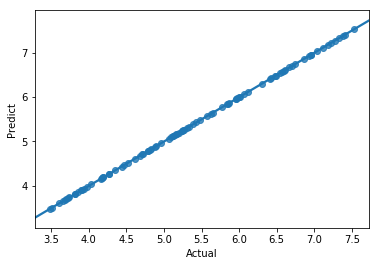

In [37]:
import seaborn as sns 
%matplotlib inline
sns.regplot(x = 'Actual', y = 'Predict', data = result_lm)